In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000})

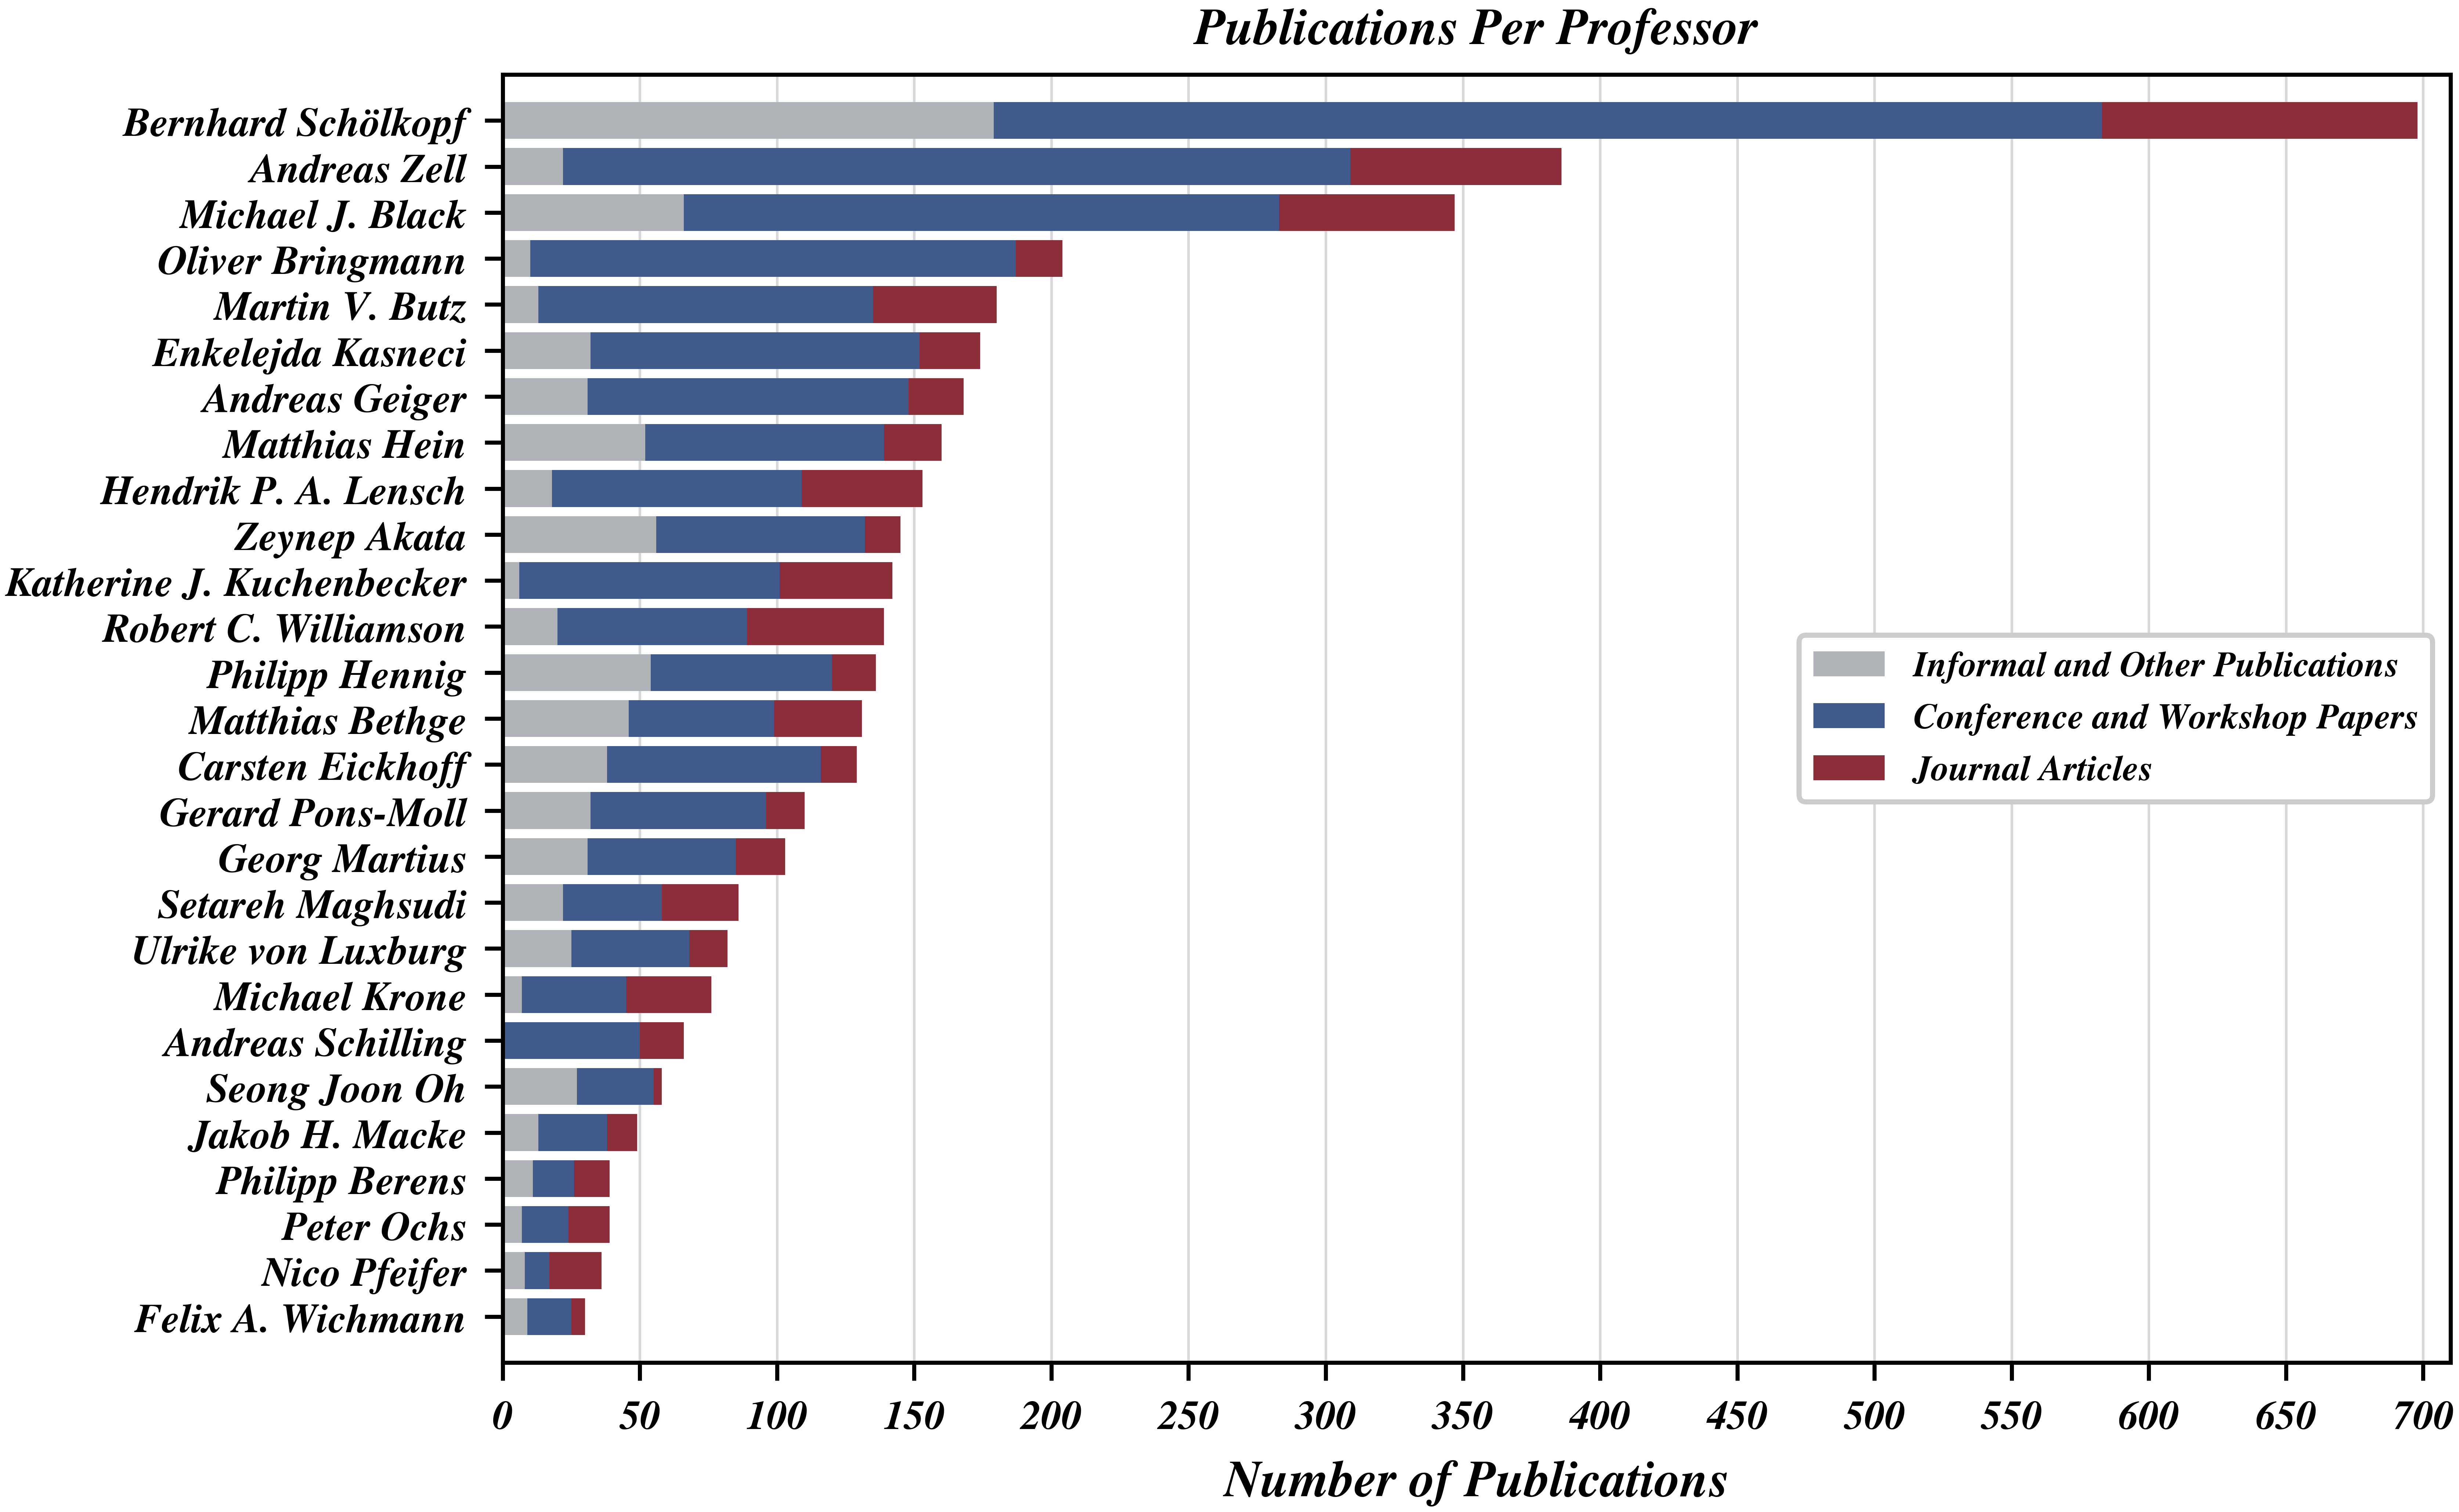

In [15]:
df = pd.read_csv("./../../dat/Publications.csv")

df = df.drop_duplicates(subset=['Professor', 'Title'], keep='first')

professors = df["Professor"].unique()
publication_types = df["Publication Type"].unique()

professors_pivot_table = df.pivot_table(index='Professor', columns='Publication Type', aggfunc='size', fill_value=0)
professors_pivot_table['Total'] = professors_pivot_table.sum(axis=1)
professors_pivot_table = professors_pivot_table.sort_values(by='Total', ascending=True)

fig, ax = plt.subplots()

ax.barh(professors_pivot_table.index, professors_pivot_table["Informal or Other Publication"], color=rgb.tue_gray, alpha=1, label="Informal and Other Publications", zorder=2)
ax.barh(professors_pivot_table.index, professors_pivot_table["Conference or Workshop Paper"], left=professors_pivot_table["Informal or Other Publication"], color=rgb.tue_darkblue, alpha=1, label="Conference and Workshop Papers", zorder=2)
ax.barh(professors_pivot_table.index, professors_pivot_table["Journal Article"], left=professors_pivot_table["Informal or Other Publication"] + professors_pivot_table["Conference or Workshop Paper"], color=rgb.tue_red, alpha=1, label="Journal Articles", zorder=2)

ax.set_xlim([0, 710])
ax.set_ylim(-1, len(professors_pivot_table.index))

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.tick_params(axis='both', labelsize=8)
ax.grid(axis="x", which="major", color=rgb.tue_gray, alpha=0.5, linewidth=0.5, zorder=1)

ax.set_xlabel('Number of Publications', fontsize=10)
ax.set_title('Publications Per Professor', fontsize=10)
ax.legend(loc="center right", framealpha=1, facecolor="white", frameon=True, fontsize=7)

plt.show()

fig.savefig('./fig_PublicationsPerProfessors.pdf')